In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing import image_dataset_from_directory

from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation,BatchNormalization, Dropout
from tensorflow.keras import Sequential
from keras.optimizers import *
""

import tensorflow as tf
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

import cv2

C:\Users\User\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\User\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\User\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
#load train images
img_size=100
train_dataset = tf.keras.utils.image_dataset_from_directory('C:/Users/User/Desktop/Training/GitHub_Project/Concrete_Classification/basedata',
                                                            validation_split=0.2,
                                                            batch_size = 32,
                                                            label_mode = 'categorical',
                                                            subset='training',
                                                            seed=12345,
                                                            image_size=(img_size,img_size),
                                                            shuffle=True
                                                           )

Found 40000 files belonging to 2 classes.
Using 32000 files for training.


In [3]:
#load test images
img_size=100
test_dataset = tf.keras.utils.image_dataset_from_directory('C:/Users/User/Desktop/Training/GitHub_Project/Concrete_Classification/basedata',
                                                           validation_split=0.2,
                                                           batch_size = 32,
                                                           label_mode = 'categorical',
                                                           subset='validation',
                                                           seed=12345,
                                                           image_size=(img_size,img_size),
                                                           shuffle=True
                                                          )

Found 40000 files belonging to 2 classes.
Using 8000 files for validation.


In [4]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [16]:
img_size = 100
model = tf.keras.models.Sequential()

# Input layer
model.add(tf.keras.layers.InputLayer(input_shape=(img_size,img_size,3)))

# 1st 2D Convolution layer
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3)))
# Max Pool layer 
# It downsmaples the input representetion within the pool_size size
model.add(tf.keras.layers.MaxPool2D())
# Normalization layer
# The layer normalizes its output using the mean and standard deviation of the current batch of inputs.
model.add(tf.keras.layers.Dropout(0.1))


# 2nd 2D Convolution layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3)))
# Max Pool layer 
model.add(tf.keras.layers.MaxPool2D())
# Normalization layer
model.add(tf.keras.layers.Dropout(0.01))

# 1st fully convolutional layer 
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3)))
# Max Pool layer 
model.add(tf.keras.layers.MaxPool2D())
# Normalization layer
model.add(tf.keras.layers.Dropout(0.001))


# Dense Layers after flattening the data
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128))



#Add Output Layer
model.add(tf.keras.layers.Dense(2, activation='softmax')) # = 6 predicted classes

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 49, 49, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 23, 23, 64)       

In [17]:
# Callbacks
import datetime
from tensorflow.keras.callbacks import TensorBoard
base_log_path = r"C:\Users\User\Desktop\Training\Deep Learning\tb_logs"
log_path = os.path.join(base_log_path, 'Concrete_Classification', datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tb = TensorBoard(log_dir=log_path)

In [18]:
epochs = 20
batch_size = 32
history = model.fit(
    train_dataset, 
    epochs=epochs,
    validation_data=test_dataset,
    batch_size = batch_size,
    shuffle = True,
    callbacks=[tb]
)

Epoch 1/20
1000/1000 [==============================] - 26s 25ms/step - loss: 14.9511 - accuracy: 0.9189 - val_loss: 17.0678 - val_accuracy: 0.7474
Epoch 2/20
1000/1000 [==============================] - 25s 25ms/step - loss: 0.6961 - accuracy: 0.9625 - val_loss: 0.8923 - val_accuracy: 0.9604
Epoch 3/20
1000/1000 [==============================] - 25s 25ms/step - loss: 2.6726 - accuracy: 0.9559 - val_loss: 0.0716 - val_accuracy: 0.9790
Epoch 4/20
1000/1000 [==============================] - 25s 25ms/step - loss: 0.0527 - accuracy: 0.9839 - val_loss: 0.0509 - val_accuracy: 0.9850
Epoch 5/20
1000/1000 [==============================] - 25s 25ms/step - loss: 0.0401 - accuracy: 0.9871 - val_loss: 0.0653 - val_accuracy: 0.9805
Epoch 6/20
1000/1000 [==============================] - 25s 25ms/step - loss: 0.0395 - accuracy: 0.9871 - val_loss: 0.1038 - val_accuracy: 0.9735
Epoch 7/20
1000/1000 [==============================] - 25s 25ms/step - loss: 0.0469 - accuracy: 0.9853 - val_loss: 0.0868

<Figure size 432x288 with 0 Axes>

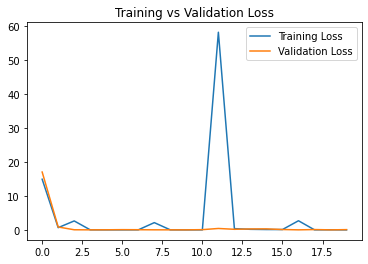

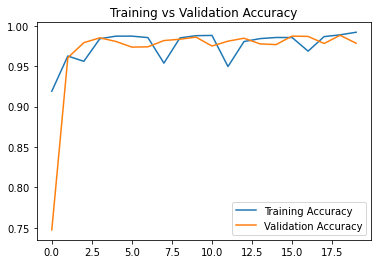

<Figure size 432x288 with 0 Axes>

In [19]:
# Visualize the result of model training
training_loss = history.history['loss']
val_loss = history.history['val_loss']
training_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs_x_axis = history.epoch

plt.plot(epochs_x_axis,training_loss,label='Training Loss')
plt.plot(epochs_x_axis,val_loss,label='Validation Loss')
plt.title("Training vs Validation Loss")
plt.legend()
plt.figure()

plt.plot(epochs_x_axis,training_acc,label='Training Accuracy')
plt.plot(epochs_x_axis,val_acc,label='Validation Accuracy')
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.figure()

In [20]:
class_names = test_dataset.class_names
print(class_names)

concrete_file = "C:/Users/User/Desktop/Training/GitHub_Project/Concrete_Classification/basedata/Positive/00001.jpg"

img = tf.keras.utils.load_img(
    concrete_file, target_size=(100, 100)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, axis=0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} "
    .format(class_names[np.argmax(score)])
)

['Negative', 'Positive']
1/1 [==============================] - 0s 166ms/step
This image most likely belongs to Positive 


In [21]:
evaluation = model.evaluate(test_dataset)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

250/250 [==============================] - 3s 13ms/step - loss: 0.1127 - accuracy: 0.9783
Test Accuracy: 97.83%
